## Importing data

In [285]:
# run this to check if required packages are installed
import subprocess
import sys

def install_packages(packages):
    """
    Ensure that all specified packages are installed. If a package is not installed,
    it will be installed automatically.

    Args:
        packages (list): A list of package names to ensure are installed.

    Returns:
        None
    """
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        else:
            print(f"{package} is already installed.")

required_packages = [
    "numpy",
    "scipy",
    "pandas",
    "wrds",
    "datetime",
    "statsmodels",
    "matplotlib",
    "pathlib",
    "pandas_datareader",
    "sklearn.linear_model",
    "warnings",
    "itertools",
    "joblib",
    "PyPortfolioOpt",
    "seaborn",
    "cvxpy",
    "certifi",
]
install_packages(required_packages)

numpy is already installed.
scipy is already installed.
pandas is already installed.
wrds is already installed.
datetime is already installed.
statsmodels is already installed.
matplotlib is already installed.
pathlib is already installed.
pandas_datareader is already installed.
sklearn.linear_model is already installed.
warnings is already installed.
itertools is already installed.
joblib is already installed.
Installing PyPortfolioOpt...
seaborn is already installed.
cvxpy is already installed.
certifi is already installed.


In [286]:
# wrds
import wrds

# dataframe related
import pandas as pd
import numpy as np

# mean-variance optimization, plot
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, expected_returns, plotting, EfficientFrontier
import seaborn as sns
import cvxpy as cp

# handle warnings in wrds
import warnings
warnings.filterwarnings("ignore")

# paths
from pathlib import Path
root_path = Path().cwd()
data_path = root_path / 'data'
if not data_path.exists():
    data_path.mkdir()

In [287]:
# WRDS connection
# wrds_username = 'your_username'
wrds_username = 'armaansa'

try:
    print("Establishing connection to WRDS database...")
    params = {
        'wrds_hostname': wrds.sql.WRDS_POSTGRES_HOST,
        'wrds_port': wrds.sql.WRDS_POSTGRES_PORT,
        'wrds_dbname': wrds.sql.WRDS_POSTGRES_DB,
        'wrds_username': wrds_username,
        'wrds_connect_args': wrds.sql.WRDS_CONNECT_ARGS,
    }

    conn = wrds.Connection(autoconnect=True, **params)
    print("Successfully connected to WRDS database.")
except Exception as e:
    print(f"Failed to connect to WRDS database: {e}")

Establishing connection to WRDS database...
Loading library list...
Done
Successfully connected to WRDS database.


In [288]:
print(conn.list_libraries())

['aha_sample', 'ahasamp', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'ciq', 'ciq_common', 'ciq_transcripts', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_bank', 'comp_bank_daily', 'comp_execucomp', 'comp_global', 'comp_global_daily', 'comp_na_annual_all', 'comp_na_daily_all', 'comp_na_monthly_all', 'comp_segments_hist', 'comp_segments_hist_daily', 'compa', 'compb', 'compg', 'compm', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'compseg', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'cont

In [289]:
conn.describe_table(library='crsp', table='msf_v2')

Approximately 5117080 rows in crsp.msf_v2.


,name,nullable,type,comment
0,permno,True,INTEGER,PERMNO
1,hdrcusip,True,VARCHAR(8),Header CUSIP -8 Characters
2,permco,True,INTEGER,PERMCO
3,siccd,True,INTEGER,Sic Code
4,nasdissuno,True,INTEGER,Nasdaq Issue Number
5,yyyymm,True,INTEGER,YYYYMM - Monthly Calendar Period Key
6,mthcaldt,True,DATE,Monthly Calendar Date
7,mthcompflg,True,VARCHAR(1),Monthly Completeness Flag
8,mthcompsubflg,True,VARCHAR(2),Monthly Completeness Sub-Flag
9,mthprc,True,"NUMERIC(13, 6)",Monthly Price


In [290]:
start_date = "06/01/2000"
end_date = "01/01/2025"

In [291]:
# 2) CRSP Monthly

from IPython.display import display

crsp_sql = f"""
SELECT
    permno,
    permco,
    ticker,                 -- Add ticker here
    mthcaldt          AS date,
    mthprc            AS prc,
    mthret            AS ret,
    mthretx           AS retx,
    shrout,
    mthcap            AS mktcap,
    siccd
FROM crsp.msf_v2
WHERE mthcaldt BETWEEN '{start_date}' AND '{end_date}';
"""

crsp_df = conn.raw_sql(crsp_sql)

# Convert 'date' column to datetime
crsp_df['date'] = pd.to_datetime(crsp_df['date'])

print("First 5 rows with ticker included:")
display(crsp_df.head())

First 5 rows with ticker included:


,permno,permco,ticker,date,prc,ret,retx,shrout,mktcap,siccd
0,10001,7953,EWST,2000-06-30,8.000000,0.027607,0.011858,2475,19800.000000,4925
1,10002,7954,SABC,2000-06-30,10.312500,0.041420,0.031250,8587,88553.440000,6020
2,10009,7965,IROQ,2000-06-30,32.687500,0.002876,0.002876,2307,75410.060000,6030
3,10012,7969,DPAC,2000-06-30,10.875000,0.912088,0.912088,19718,214433.250000,3674
4,10016,1728,SCTT,2000-06-30,17.187500,-0.059829,-0.059829,16947,291276.560000,3812


In [292]:
#Retrieve Fundamental Data from Compustat
comp_sql = f"""
SELECT gvkey,
       datadate,
       fyear,
       ceq,   -- common equity
       ni,    -- net income
       at     -- total assets
FROM comp.funda
WHERE indfmt='INDL'
  AND datafmt='STD'
  AND popsrc='D'
  AND consol='C'
  AND datadate BETWEEN '{start_date}' AND '{end_date}';
"""

comp_df = conn.raw_sql(comp_sql, date_cols=['datadate'])

print("First 5 rows")
display(comp_df.head())


First 5 rows


,gvkey,datadate,fyear,ceq,ni,at
0,001004,2001-05-31,2000,340.212000,18.531000,701.854000
1,001004,2002-05-31,2001,310.235000,-58.939000,710.199000
2,001004,2003-05-31,2002,294.988000,-12.410000,686.621000
3,001004,2004-05-31,2003,301.684000,3.504000,709.292000
4,001004,2005-05-31,2004,314.744000,15.453000,732.230000


In [293]:
# Pull the CCM (CRSP–Compustat Merged) Link Table
# Pull the CCM (CRSP–Compustat Merged) Link Table
link_sql = """
SELECT gvkey,
       lpermno AS permno,
       linktype,
       linkprim,
       linkdt,
       linkenddt
FROM crsp.ccmxpf_linktable
WHERE linktype IN ('LC','LU','LS','LN')
  AND linkprim IN ('P','C')
"""
ccmlink = conn.raw_sql(link_sql)

print("CCM link table (raw) - first 5 rows:")
display(ccmlink.head())

# Convert linkdt / linkenddt to datetime
ccmlink['linkdt'] = pd.to_datetime(ccmlink['linkdt'])
ccmlink['linkenddt'] = pd.to_datetime(ccmlink['linkenddt'])

print("\nAfter converting linkdt/linkenddt to datetime (first 5 rows):")
display(ccmlink.head())

# Fill missing linkenddt with 2099-12-31
ccmlink['linkenddt'] = ccmlink['linkenddt'].fillna(pd.to_datetime('2099-12-31'))

print("\nAfter filling missing linkenddt with 2099-12-31 (first 5 rows):")
display(ccmlink.head())

print("\nFinal shape of ccmlink DataFrame:", ccmlink.shape)


CCM link table (raw) - first 5 rows:


,gvkey,permno,linktype,linkprim,linkdt,linkenddt
0,001000,25881.000000,LU,P,1970-11-13,1978-06-30
1,001001,10015.000000,LU,P,1983-09-20,1986-07-31
2,001002,10023.000000,LC,C,1972-12-14,1973-06-05
3,001003,10031.000000,LU,C,1983-12-07,1989-08-16
4,001004,54594.000000,LU,P,1972-04-24,<NA>



After converting linkdt/linkenddt to datetime (first 5 rows):


,gvkey,permno,linktype,linkprim,linkdt,linkenddt
0,001000,25881.000000,LU,P,1970-11-13,1978-06-30
1,001001,10015.000000,LU,P,1983-09-20,1986-07-31
2,001002,10023.000000,LC,C,1972-12-14,1973-06-05
3,001003,10031.000000,LU,C,1983-12-07,1989-08-16
4,001004,54594.000000,LU,P,1972-04-24,NaT



After filling missing linkenddt with 2099-12-31 (first 5 rows):


,gvkey,permno,linktype,linkprim,linkdt,linkenddt
0,001000,25881.000000,LU,P,1970-11-13,1978-06-30
1,001001,10015.000000,LU,P,1983-09-20,1986-07-31
2,001002,10023.000000,LC,C,1972-12-14,1973-06-05
3,001003,10031.000000,LU,C,1983-12-07,1989-08-16
4,001004,54594.000000,LU,P,1972-04-24,2099-12-31



Final shape of ccmlink DataFrame: (38979, 6)


In [294]:
#Step 5: Merge Compustat with the Link Table

comp_linked = pd.merge(comp_df, ccmlink, on='gvkey', how='left')

print("After merging comp_df with ccmlink - first 5 rows:")
display(comp_linked.head())

# Filter rows where datadate is within the linkdt/linkenddt range
comp_linked = comp_linked[
    (comp_linked['datadate'] >= comp_linked['linkdt']) &
    (comp_linked['datadate'] <= comp_linked['linkenddt'])
]

print("\nAfter filtering by linkdt/linkenddt:")
print("Shape of comp_linked:", comp_linked.shape)
display(comp_linked.head())


After merging comp_df with ccmlink - first 5 rows:


,gvkey,datadate,fyear,ceq,ni,at,permno,linktype,linkprim,linkdt,linkenddt
0,001004,2001-05-31,2000,340.212000,18.531000,701.854000,54594.000000,LU,P,1972-04-24,2099-12-31
1,001004,2002-05-31,2001,310.235000,-58.939000,710.199000,54594.000000,LU,P,1972-04-24,2099-12-31
2,001004,2003-05-31,2002,294.988000,-12.410000,686.621000,54594.000000,LU,P,1972-04-24,2099-12-31
3,001004,2004-05-31,2003,301.684000,3.504000,709.292000,54594.000000,LU,P,1972-04-24,2099-12-31
4,001004,2005-05-31,2004,314.744000,15.453000,732.230000,54594.000000,LU,P,1972-04-24,2099-12-31



After filtering by linkdt/linkenddt:
Shape of comp_linked: (179734, 11)


,gvkey,datadate,fyear,ceq,ni,at,permno,linktype,linkprim,linkdt,linkenddt
0,001004,2001-05-31,2000,340.212000,18.531000,701.854000,54594.000000,LU,P,1972-04-24,2099-12-31
1,001004,2002-05-31,2001,310.235000,-58.939000,710.199000,54594.000000,LU,P,1972-04-24,2099-12-31
2,001004,2003-05-31,2002,294.988000,-12.410000,686.621000,54594.000000,LU,P,1972-04-24,2099-12-31
3,001004,2004-05-31,2003,301.684000,3.504000,709.292000,54594.000000,LU,P,1972-04-24,2099-12-31
4,001004,2005-05-31,2004,314.744000,15.453000,732.230000,54594.000000,LU,P,1972-04-24,2099-12-31


In [295]:
# Step 6: Merge with CRSP Data

# Tag each CRSP and Compustat row with the year (for merging)
crsp_df['year'] = crsp_df['date'].dt.year
comp_linked['year'] = comp_linked['datadate'].dt.year

# Now merge on ['permno', 'year']
merged_df = pd.merge(crsp_df, comp_linked, on=['permno', 'year'], how='inner')

# Display result
print("Merged CRSP + Compustat data (first 5 rows):")
print("Shape of merged_df:", merged_df.shape)
display(merged_df.head())


Merged CRSP + Compustat data (first 5 rows):
Shape of merged_df: (2041988, 21)


,permno,permco,ticker,date,prc,ret,retx,shrout,mktcap,siccd,...,gvkey,datadate,fyear,ceq,ni,at,linktype,linkprim,linkdt,linkenddt
0,10001,7953,EWST,2000-06-30,8.000000,0.027607,0.011858,2475,19800.000000,4925,...,012994,2000-06-30,2000,13.961000,1.297000,50.553000,LC,P,1986-01-09,2017-08-31
1,10002,7954,SABC,2000-06-30,10.312500,0.041420,0.031250,8587,88553.440000,6020,...,019049,2000-12-31,2000,70.835000,7.447000,577.116000,LU,P,1986-01-10,2013-02-28
2,10016,1728,SCTT,2000-06-30,17.187500,-0.059829,-0.059829,16947,291276.560000,3812,...,004641,2000-12-31,2000,107.009000,24.277000,278.954000,LC,P,1986-01-24,2001-05-31
3,10025,7975,AEPI,2000-06-30,25.250000,0.530303,0.530303,7508,189577.000000,3081,...,011903,2000-10-31,2000,52.830000,-4.049000,471.690000,LU,P,1986-01-30,2017-01-31
4,10026,7976,JJSF,2000-06-30,17.875000,0.201681,0.201681,8542,152688.250000,2052,...,012825,2000-09-30,2000,133.274000,9.968000,220.039000,LU,P,1986-02-04,2099-12-31


In [296]:
# 1. First identify companies currently in the S&P 500 (as of the most recent date)
current_date = '2024-12-31'  # Most recent date in your dataset
current_sp500_sql = f"""
SELECT DISTINCT a.permno, b.ticker, b.comnam
FROM crsp.msp500list AS a
JOIN crsp.msenames AS b
ON a.permno = b.permno
WHERE '{current_date}' BETWEEN a.start AND a.ending
  AND '{current_date}' BETWEEN b.namedt AND b.nameendt
"""

current_sp500 = conn.raw_sql(current_sp500_sql)
print(f"Number of current S&P 500 companies identified: {len(current_sp500)}")

# 2. Get the list of permnos for these current S&P 500 companies
sp500_permnos = current_sp500['permno'].tolist()

# 3. Filter the merged dataset to only include these companies' data 
# across the entire date range (2000-2024)
current_sp500_historical = merged_df[merged_df['permno'].isin(sp500_permnos)]

# 4. Check the date range to confirm we have the full historical data
print(f"Date range in filtered dataset: {current_sp500_historical['date'].min()} to {current_sp500_historical['date'].max()}")
print(f"Number of unique companies in filtered dataset: {current_sp500_historical['permno'].nunique()}")
print(f"Total number of observations: {len(current_sp500_historical)}")

# 5. Save this dataset for further analysis if needed
# current_sp500_historical.to_csv('sp500_historical_data.csv', index=False)
# Final check on the filtered dataset
print(f"Number of unique tickers in filtered dataset: {current_sp500_historical['ticker'].nunique()}")
current_sp500_historical.head()

Number of current S&P 500 companies identified: 503
Date range in filtered dataset: 2000-06-30 00:00:00 to 2024-12-31 00:00:00
Number of unique companies in filtered dataset: 500
Total number of observations: 129168
Number of unique tickers in filtered dataset: 600


,permno,permco,ticker,date,prc,ret,retx,shrout,mktcap,siccd,...,gvkey,datadate,fyear,ceq,ni,at,linktype,linkprim,linkdt,linkenddt
20,10107,8048,MSFT,2000-06-30,80.000000,0.278721,0.278721,5262405,420992400.000000,7370,...,012141,2000-06-30,2000,41368.000000,9421.000000,52150.000000,LC,P,1986-03-13,2099-12-31
30,10138,8087,TROW,2000-06-30,42.500000,0.116323,0.112930,121275,5154187.500000,6211,...,012138,2000-12-31,2000,991.065000,269.029000,1469.459000,LU,P,1986-04-02,2099-12-31
32,10145,22168,HON,2000-06-30,33.687500,-0.384000,-0.384000,798161,26888048.690000,3724,...,001300,2000-12-31,2000,9707.000000,1659.000000,25175.000000,LC,P,1962-01-31,2099-12-31
92,10516,20207,ADM,2000-06-30,9.812500,-0.178010,-0.178010,602162,5908714.630000,2046,...,001722,2000-06-30,2000,6110.243000,300.903000,14423.100000,LC,P,1962-01-31,2099-12-31
122,10696,8598,FISV,2000-06-30,43.250000,-0.074866,-0.074866,123220,5329265.000000,7374,...,012635,2000-12-31,2000,1252.072000,177.021000,5586.320000,LC,P,1986-09-25,2099-12-31


In [297]:
current_tickers = current_sp500_historical['ticker'].unique()
print(f"Number of unique tickers: {len(current_tickers)}")
print("Sample of current S&P 500 tickers:")
print(current_tickers[:20])  # Show first 20 tickers

Number of unique tickers: 601
Sample of current S&P 500 tickers:
<StringArray>
['MSFT', 'TROW',  'HON',  'ADM', 'FISV',   'KO',  'CDN',   'ED',  'FIC',
 'FAST',  'DTE',  'ETN',  'XOM',  'MGG',  'WMI',   'GD',   'GE',   'LH',
   'IR',  'IBM']
Length: 20, dtype: string


In [298]:
# Find permnos that were identified but don't appear in the dataset
missing_permnos = set(sp500_permnos) - set(current_sp500_historical['permno'].unique())
print(f"Number of identified companies missing from dataset: {len(missing_permnos)}")

# Check companies with multiple tickers
ticker_counts = current_sp500_historical.groupby('permno')['ticker'].nunique()
multi_ticker_companies = ticker_counts[ticker_counts > 1]
print(f"Number of companies with multiple tickers: {len(multi_ticker_companies)}")
print(f"Max number of tickers for a single company: {ticker_counts.max()}")

# Example of companies with multiple tickers
if len(multi_ticker_companies) > 0:
    sample_permno = multi_ticker_companies.index[0]
    ticker_example = current_sp500_historical[current_sp500_historical['permno'] == sample_permno][['date', 'ticker']].drop_duplicates().sort_values('date')
    print(f"\nExample of ticker changes for permno {sample_permno}:")
    print(ticker_example)

Number of identified companies missing from dataset: 3
Number of companies with multiple tickers: 86
Max number of tickers for a single company: 4

Example of ticker changes for permno 10696:
              date ticker
122     2000-06-30   FISV
6820    2000-07-31   FISV
13576   2000-08-31   FISV
20403   2000-09-29   FISV
27278   2000-10-31   FISV
...            ...    ...
1999861 2024-08-30     FI
2008096 2024-09-30     FI
2016465 2024-10-31     FI
2024914 2024-11-29     FI
2033420 2024-12-31     FI

[295 rows x 2 columns]


In [299]:
def map_tickers_to_permnos(tickers, as_of_date="2024-12-31"):
    """
    Map ticker symbols to CRSP permnos
    
    Parameters:
    tickers (list): List of ticker symbols
    as_of_date (str): Date to use for mapping, in YYYY-MM-DD format
    
    Returns:
    DataFrame with ticker, permno, and company name
    """
    # Convert tickers list to SQL-friendly format
    tickers_str = "', '".join(tickers)
    
    # SQL query to map tickers to permnos
    sql = f"""
    SELECT DISTINCT ticker, permno, comnam
    FROM crsp.msenames
    WHERE ticker IN ('{tickers_str}')
    AND '{as_of_date}' BETWEEN namedt AND nameendt
    """
    
    ticker_permno_map = conn.raw_sql(sql)
    
    return ticker_permno_map

In [300]:
# Load QUAL ETF holdings from CSV file
import os
import pandas as pd

# Read the CSV file with the correct path
qual_holdings = pd.read_csv(os.path.expanduser('~/Downloads/476 Data/QUAL-holdings.csv'))

# Extract the ticker column (adjust the column name if needed)
qual_tickers = qual_holdings['Ticker'].tolist()  # Change 'Ticker' to match your CSV column name

print(f"Loaded {len(qual_tickers)} tickers from QUAL holdings file")

# Now map the tickers to permnos
qual_permno_map = map_tickers_to_permnos(qual_tickers)
print(f"Successfully mapped {len(qual_permno_map)} tickers to permnos")

# Get list of permnos for filtering
qual_permnos = qual_permno_map['permno'].tolist()

# Filter the merged dataset to only include QUAL holdings
qual_historical = merged_df[merged_df['permno'].isin(qual_permnos)]

# Check the results
print(f"\nQUAL ETF historical data summary:")
print(f"Date range: {qual_historical['date'].min()} to {qual_historical['date'].max()}")
print(f"Number of unique companies: {qual_historical['permno'].nunique()}")
print(f"Number of unique tickers: {qual_historical['ticker'].nunique()}")

# Display sample of tickers
qual_unique_tickers = qual_historical['ticker'].unique()
print("Sample of QUAL ETF component tickers:")
print(qual_unique_tickers[:20])

Loaded 125 tickers from QUAL holdings file
Successfully mapped 122 tickers to permnos

QUAL ETF historical data summary:
Date range: 2000-06-30 00:00:00 to 2024-12-31 00:00:00
Number of unique companies: 121
Number of unique tickers: 135
Sample of QUAL ETF component tickers:
<StringArray>
['MSFT', 'TROW',   'KO',  'CDN',   'ED', 'FAST',   'IR',  'PEP',    'P',
  'SLB', 'AAPL', 'AMAT',  'TXN',  'HSY',   'PG',  'CAT',  'LMT',  'JNJ',
  'PPG',  'MMM']
Length: 20, dtype: string


In [301]:
# Check if these tickers exist in the merged database
missing_tickers = ['EXE', 'SOLV', 'BF.B']

for ticker in missing_tickers:
    # Check in the merged database
    ticker_in_merged = merged_df[merged_df['ticker'] == ticker]
    print(f"\nChecking for {ticker} in merged database:")
    print(f"Found {len(ticker_in_merged)} records")
    
    if len(ticker_in_merged) > 0:
        # If found, show some sample data
        print(f"Sample data for {ticker}:")
        print(ticker_in_merged[['date', 'permno', 'ticker', 'gvkey']].head())
    else:
        # If not found in merged data, check if it exists in CRSP
        crsp_check = conn.raw_sql(f"""
            SELECT DISTINCT permno, ticker, comnam, namedt, nameendt
            FROM crsp.msenames
            WHERE ticker = '{ticker}'
            ORDER BY namedt DESC
        """)
        
        print(f"Checking CRSP database for {ticker}:")
        print(f"Found {len(crsp_check)} records")
        if len(crsp_check) > 0:
            print(crsp_check.head())


Checking for EXE in merged database:
Found 114 records
Sample data for EXE:
            date  permno ticker   gvkey
4218  2000-06-30   83448    EXE  013992
10917 2000-07-31   83448    EXE  013992
17671 2000-08-31   83448    EXE  013992
24497 2000-09-29   83448    EXE  013992
31368 2000-10-31   83448    EXE  013992

Checking for SOLV in merged database:
Found 9 records
Sample data for SOLV:
              date  permno ticker   gvkey
1972563 2024-04-30   24877   SOLV  045167
1980540 2024-05-31   24877   SOLV  045167
1988582 2024-06-28   24877   SOLV  045167
1996693 2024-07-31   24877   SOLV  045167
2004884 2024-08-30   24877   SOLV  045167

Checking for BF.B in merged database:
Found 0 records
Checking CRSP database for BF.B:
Found 0 records


## Factors

In [303]:
# Step 1: Prepare the data and calculate factor scores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set pandas display options to avoid scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Clean the data to handle missing values and outliers
def prepare_data(df):
    """
    Clean the dataset by handling missing values and outliers.
    
    Parameters:
    df (DataFrame): Merged CRSP-Compustat data
    
    Returns:
    DataFrame: Cleaned data ready for analysis
    """
    # Make a copy to avoid modifying the original dataframe
    clean_df = df.copy()
    
    # Drop rows with missing values in essential columns
    essential_columns = ['permno', 'date', 'ret', 'mktcap', 'ceq', 'ni', 'at']
    clean_df = clean_df.dropna(subset=essential_columns)
    
    # Replace infinite values with NaN
    clean_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Remove outliers (values more than 3 standard deviations from mean)
    for col in ['ret', 'mktcap', 'ceq', 'ni', 'at']:
        mean = clean_df[col].mean()
        std = clean_df[col].std()
        clean_df = clean_df[
            (clean_df[col] > mean - 3*std) & 
            (clean_df[col] < mean + 3*std)
        ]
    
    # Add year and month columns for easier grouping
    clean_df['year'] = pd.DatetimeIndex(clean_df['date']).year
    clean_df['month'] = pd.DatetimeIndex(clean_df['date']).month
    
    return clean_df

# Calculate factor scores
def calculate_factor_scores(df):
    """
    Calculate factor scores for quality, value, and size.
    
    Parameters:
    df (DataFrame): Cleaned CRSP-Compustat data
    
    Returns:
    DataFrame: Data with added factor scores
    """
    # Make a copy to avoid modifying the input dataframe
    result = df.copy()
    
    # --- Quality Factor Metrics ---
    # 1. Return on Equity (ROE) = Net Income / Book Equity
    result['roe'] = result['ni'] / result['ceq']
    
    # 2. Return on Assets (ROA) = Net Income / Total Assets
    result['roa'] = result['ni'] / result['at']
    
    # 3. Gross Profitability = Net Income / Market Cap
    result['gross_profit'] = result['ni'] / result['mktcap']
    
    # --- Value Factor Metrics ---
    # 1. Book-to-Market Ratio (B/M) = Book Equity / Market Cap
    result['bm_ratio'] = result['ceq'] / result['mktcap']
    
    # 2. Earnings-to-Price (E/P) = Net Income / Market Cap
    result['ep_ratio'] = result['ni'] / result['mktcap']
    
    # Replace infinite values with NaN
    metrics = ['roe', 'roa', 'gross_profit', 'bm_ratio', 'ep_ratio']
    for metric in metrics:
        result[metric] = result[metric].replace([np.inf, -np.inf], np.nan)
    
    # Group by year-month and calculate z-scores
    groups = result.groupby(['year', 'month'])
    
    # Initialize z-score columns
    for metric in metrics:
        result[f'{metric}_z'] = np.nan
    
    # Calculate z-scores within each month
    for (yr, mo), group in groups:
        group_idx = group.index
        for metric in metrics:
            mean = group[metric].mean()
            std = group[metric].std()
            if std != 0:
                result.loc[group_idx, f'{metric}_z'] = (group[metric] - mean) / std
    
    # Create composite factor scores
    # Quality: average of ROE, ROA, Gross Profit (higher is better)
    result['quality_score'] = result[['roe_z', 'roa_z', 'gross_profit_z']].mean(axis=1)
    
    # Value: average of B/M, E/P (higher means more value)
    result['value_score'] = result[['bm_ratio_z', 'ep_ratio_z']].mean(axis=1)
    
    # Size: negative of market cap z-score (smaller is better for size factor)
    result['size_score'] = -result.groupby(['year', 'month'])['mktcap'].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    
    return result

# Use this code with your dataset:
# First, clean your merged dataset
cleaned_data = prepare_data(current_sp500_historical)

# Then, calculate factor scores
data_with_scores = calculate_factor_scores(cleaned_data)

# View the first few rows of the data with factor scores
print(data_with_scores[['date', 'ticker', 'quality_score', 'value_score', 'size_score']].head())

# Check basic statistics of the factor scores
print("\nFactor score statistics:")
print(data_with_scores[['quality_score', 'value_score', 'size_score']].describe())

          date ticker  quality_score  value_score  size_score
30  2000-06-30   TROW       0.394536    -0.433418    0.308737
92  2000-06-30    ADM      -0.229227     0.570734    0.285513
122 2000-06-30   FISV      -0.195341    -0.503869    0.303348
210 2000-06-30     KO      -0.000963    -0.822437   -3.908446
228 2000-06-30    CDN      -0.365543    -0.716914    0.313325

Factor score statistics:
       quality_score   value_score    size_score
count  118755.000000 118755.000000 118755.000000
mean       -0.000000      0.000000      0.000000
std         0.708397      0.750030      0.998761
min       -17.309785    -11.920048     -9.634025
25%        -0.188184     -0.401674     -0.081524
50%         0.045082     -0.088920      0.341313
75%         0.263696      0.328819      0.538043
max        11.000308      6.728819      0.950434


In [304]:
# Step 2: Form portfolios based on factor scores

def form_factor_portfolios(df, n_portfolios=5):
    """
    Form portfolios based on factor scores.
    
    Parameters:
    df (DataFrame): Dataframe with factor scores (output from calculate_factor_scores)
    n_portfolios (int): Number of portfolios to form (e.g., 5 for quintiles)
    
    Returns:
    DataFrame: Data with portfolio assignments added
    """
    # Make a copy to avoid modifying the input dataframe
    result = df.copy()
    
    # Initialize portfolio columns
    for factor in ['quality', 'value', 'size']:
        result[f'{factor}_portfolio'] = np.nan
    
    # Group by year and month
    groups = result.groupby(['year', 'month'])
    
    # For each month, assign stocks to portfolios
    for (yr, mo), group in groups:
        for factor in ['quality', 'value', 'size']:
            score_col = f'{factor}_score'
            port_col = f'{factor}_portfolio'
            
            # Skip if all values are missing
            if group[score_col].isna().all():
                continue
                
            # Calculate quantile breakpoints
            try:
                # Create n_portfolios (e.g., 5 for quintiles)
                # Portfolio 1 = lowest score, Portfolio 5 = highest score
                breakpoints = group[score_col].quantile(
                    q=[i/n_portfolios for i in range(1, n_portfolios)]
                )
                
                # Assign portfolios (1 to n_portfolios)
                port_assignments = pd.qcut(
                    group[score_col], 
                    q=n_portfolios, 
                    labels=False, 
                    duplicates='drop'
                ) + 1
                
                # Store portfolio assignments
                result.loc[group.index, port_col] = port_assignments.values
                
            except Exception as e:
                # Handle edge cases (e.g., too few distinct values)
                print(f"Warning: Could not form portfolios for {factor} in {yr}-{mo}: {e}")
                continue
    
    # Convert portfolio columns to integers (for easier handling)
    for factor in ['quality', 'value', 'size']:
        port_col = f'{factor}_portfolio'
        result[port_col] = result[port_col].fillna(0).astype(int)
    
    return result

# Continue from Step 1:
# Form portfolios based on the factor scores
data_with_portfolios = form_factor_portfolios(data_with_scores, n_portfolios=5)

# Examine the distribution of stocks across portfolios
portfolio_counts = {}
for factor in ['quality', 'value', 'size']:
    port_col = f'{factor}_portfolio'
    portfolio_counts[factor] = data_with_portfolios[port_col].value_counts().sort_index()

# Display the number of stocks in each portfolio
print("Distribution of stocks across portfolios:")
for factor, counts in portfolio_counts.items():
    print(f"\n{factor.capitalize()} factor portfolios:")
    print(counts)
    print(f"Total stocks with {factor} portfolio assignments: {counts.sum()}")

# Check a sample of the portfolio assignments
sample_month = data_with_portfolios.loc[
    (data_with_portfolios['year'] == 2010) & 
    (data_with_portfolios['month'] == 6)
]

print("\nSample portfolio assignments for June 2010:")
print(sample_month[['ticker', 'quality_score', 'quality_portfolio', 
                   'value_score', 'value_portfolio', 
                   'size_score', 'size_portfolio']].head(10))

Distribution of stocks across portfolios:

Quality factor portfolios:
quality_portfolio
1    23870
2    23687
3    23699
4    23687
5    23812
Name: count, dtype: int64
Total stocks with quality portfolio assignments: 118755

Value factor portfolios:
value_portfolio
1    23870
2    23687
3    23699
4    23687
5    23812
Name: count, dtype: int64
Total stocks with value portfolio assignments: 118755

Size factor portfolios:
size_portfolio
1    23870
2    23687
3    23699
4    23687
5    23812
Name: count, dtype: int64
Total stocks with size portfolio assignments: 118755

Sample portfolio assignments for June 2010:
       ticker  quality_score  quality_portfolio  value_score  value_portfolio  \
787923   ORCL       0.154568                  4    -0.372428                2   
787927   TROW       0.498071                  5    -0.352039                2   
787928    HON       0.027857                  3    -0.191206                2   
787965    ADM       0.290977                  4     0.8

In [305]:
# Step 3: Calculate portfolio returns for each factor

def calculate_portfolio_returns(df, weighted=True):
    """
    Calculate returns for each factor portfolio.
    
    Parameters:
    df (DataFrame): Dataframe with portfolio assignments
    weighted (bool): If True, calculate value-weighted returns, else equal-weighted
    
    Returns:
    dict: Dictionary of DataFrames containing monthly returns for each factor portfolio
    """
    # Initialize dictionary to store portfolio returns
    portfolio_returns = {}
    
    # Group by year and month
    month_groups = df.groupby(['year', 'month'])
    
    for factor in ['quality', 'value', 'size']:
        port_col = f'{factor}_portfolio'
        
        # Initialize lists to store monthly returns data
        monthly_returns = []
        
        # Process each month
        for (yr, mo), month_data in month_groups:
            # Skip months with no return data
            if month_data['ret'].isna().all():
                continue
            
            # Initialize list to store returns for each portfolio (1-5)
            port_returns = []
            
            # For each portfolio (1 to 5)
            for port_num in range(1, 6):
                # Select stocks in this portfolio
                port_stocks = month_data[month_data[port_col] == port_num]
                
                # Skip if portfolio is empty
                if len(port_stocks) == 0:
                    port_returns.append(np.nan)
                    continue
                
                if weighted:
                    # Value-weighted return
                    weights = port_stocks['mktcap'] / port_stocks['mktcap'].sum()
                    port_return = (port_stocks['ret'] * weights).sum()
                else:
                    # Equal-weighted return
                    port_return = port_stocks['ret'].mean()
                
                port_returns.append(port_return)
            
            # Add long-short portfolio (High Minus Low)
            # P5 (highest) minus P1 (lowest)
            if not np.isnan(port_returns[0]) and not np.isnan(port_returns[4]):
                hml_return = port_returns[4] - port_returns[0]
            else:
                hml_return = np.nan
            
            # Create a dictionary for this month's returns
            month_record = {
                'year': yr,
                'month': mo,
                'date': pd.Timestamp(year=yr, month=mo, day=1),
                f'{factor}_P1': port_returns[0],
                f'{factor}_P2': port_returns[1],
                f'{factor}_P3': port_returns[2],
                f'{factor}_P4': port_returns[3],
                f'{factor}_P5': port_returns[4],
                f'{factor}_HML': hml_return
            }
            
            monthly_returns.append(month_record)
        
        # Convert to DataFrame
        factor_returns = pd.DataFrame(monthly_returns)
        portfolio_returns[factor] = factor_returns
    
    return portfolio_returns

# Continue from Step 2:
# Calculate portfolio returns
portfolio_returns = calculate_portfolio_returns(data_with_portfolios, weighted=True)

# Display the first few rows of returns for each factor
for factor, returns in portfolio_returns.items():
    print(f"\n{factor.capitalize()} Factor Portfolio Returns:")
    print(returns.head())

# Calculate basic statistics for the High-Minus-Low (HML) portfolios
for factor, returns in portfolio_returns.items():
    hml_col = f'{factor}_HML'
    hml_returns = returns[hml_col].dropna()
    
    print(f"\n{factor.capitalize()} HML Portfolio Statistics:")
    print(f"Mean monthly return: {hml_returns.mean():.6f}")
    print(f"Standard deviation: {hml_returns.std():.6f}")
    print(f"Minimum: {hml_returns.min():.6f}")
    print(f"Maximum: {hml_returns.max():.6f}")
    print(f"% of months positive: {(hml_returns > 0).mean() * 100:.2f}%")
    
    # Calculate annualized values
    ann_return = (1 + hml_returns.mean()) ** 12 - 1
    ann_vol = hml_returns.std() * np.sqrt(12)
    sharpe = ann_return / ann_vol if ann_vol != 0 else np.nan
    
    print(f"Annualized return: {ann_return:.6f}")
    print(f"Annualized volatility: {ann_vol:.6f}")
    print(f"Sharpe ratio: {sharpe:.4f}")


Quality Factor Portfolio Returns:
   year  month       date  quality_P1  quality_P2  quality_P3  quality_P4  \
0  2000      6 2000-06-01   -0.007362   -0.014966    0.068858    0.009399   
1  2000      7 2000-07-01    0.011797    0.059430    0.010295    0.002868   
2  2000      8 2000-08-01    0.078047    0.085443    0.024251    0.065207   
3  2000      9 2000-09-01   -0.034468    0.059255    0.052546   -0.010011   
4  2000     10 2000-10-01   -0.038572    0.014496    0.060599    0.000235   

   quality_P5  quality_HML  
0    0.025360     0.032723  
1   -0.065916    -0.077712  
2    0.073860    -0.004187  
3   -0.007222     0.027246  
4    0.070192     0.108764  

Value Factor Portfolio Returns:
   year  month       date  value_P1  value_P2  value_P3  value_P4  value_P5  \
0  2000      6 2000-06-01  0.071509 -0.007861 -0.021948 -0.058706 -0.079735   
1  2000      7 2000-07-01 -0.046625  0.005448  0.044123  0.040684  0.066510   
2  2000      8 2000-08-01  0.082275  0.036333  0.069494  0

In [306]:
# Step 4A: Analyze correlations between factors and run regressions

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def analyze_factor_correlations(portfolio_returns):
    """
    Analyze correlations between factor portfolio returns.
    
    Parameters:
    portfolio_returns (dict): Dictionary of DataFrames with portfolio returns
    
    Returns:
    DataFrame: Correlation matrix of factor portfolio returns
    """
    # Extract HML (High Minus Low) returns for each factor
    hml_returns = pd.DataFrame()
    
    for factor, returns in portfolio_returns.items():
        # Get the HML column and rename it to the factor name
        hml_col = f'{factor}_HML'
        factor_returns = returns[['date', hml_col]].copy()
        factor_returns.rename(columns={hml_col: factor}, inplace=True)
        factor_returns.set_index('date', inplace=True)
        
        # Add to the combined DataFrame
        if hml_returns.empty:
            hml_returns = factor_returns
        else:
            hml_returns = hml_returns.join(factor_returns, how='outer')
    
    # Calculate correlation matrix
    corr_matrix = hml_returns.corr()
    
    # Calculate p-values for correlations
    p_values = pd.DataFrame(index=corr_matrix.index, columns=corr_matrix.columns)
    
    for i in corr_matrix.index:
        for j in corr_matrix.columns:
            if i != j:  # Skip diagonal (self-correlations)
                # Drop rows with NaN values in either series
                valid_data = hml_returns[[i, j]].dropna()
                if len(valid_data) > 1:  # Need at least 2 points for correlation
                    _, p_val = pearsonr(valid_data[i], valid_data[j])
                    p_values.loc[i, j] = p_val
                else:
                    p_values.loc[i, j] = np.nan
            else:
                p_values.loc[i, j] = 0.0  # Self-correlation p-value is 0
    
    return corr_matrix, p_values, hml_returns

def run_regression_analysis(hml_returns):
    """
    Run regression analysis between factors.
    
    Parameters:
    hml_returns (DataFrame): DataFrame with factor returns
    
    Returns:
    dict: Regression results
    """
    regression_results = {}
    
    # List of factors
    factors = hml_returns.columns.tolist()
    
    # Run regression for each pair of factors
    for dependent in factors:
        for independent in factors:
            if dependent != independent:
                # Prepare data
                y = hml_returns[dependent].dropna()
                X = hml_returns[independent].loc[y.index].dropna()
                
                # Ensure we have matching indices
                common_idx = y.index.intersection(X.index)
                y = y.loc[common_idx]
                X = X.loc[common_idx]
                
                if len(X) > 0:
                    # Add constant (intercept)
                    X_with_const = add_constant(X)
                    
                    # Run OLS regression
                    model = OLS(y, X_with_const).fit()
                    
                    # Store results
                    key = f"{dependent}_on_{independent}"
                    regression_results[key] = {
                        'coefficient': model.params[independent],
                        'p_value': model.pvalues[independent],
                        'r_squared': model.rsquared,
                        'intercept': model.params['const'],
                        'observations': len(y)
                    }
    
    return regression_results

# Continue from Step 3:
# Analyze correlations between factors
corr_matrix, p_values, hml_returns = analyze_factor_correlations(portfolio_returns)

# Display correlation matrix and p-values
print("Factor Return Correlations:")
print(corr_matrix)
print("\nCorrelation P-Values:")
print(p_values)

# Run regression analysis
regression_results = run_regression_analysis(hml_returns)

# Display regression results in a clearer format
print("\nRegression Analysis:")
for relationship, results in regression_results.items():
    print(f"\n{relationship}:")
    print(f"Coefficient: {results['coefficient']:.4f}")
    print(f"P-value: {results['p_value']:.4f}")
    print(f"R-squared: {results['r_squared']:.4f}")
    print(f"Intercept: {results['intercept']:.4f}")
    print(f"Observations: {results['observations']}")

# Interpret correlations
print("\nKey Findings from Correlation Analysis:")
for i in range(len(corr_matrix.index)):
    for j in range(i+1, len(corr_matrix.columns)):
        factor1 = corr_matrix.index[i]
        factor2 = corr_matrix.columns[j]
        corr = corr_matrix.iloc[i, j]
        p_val = p_values.iloc[i, j]
        
        if abs(corr) < 0.1:
            strength = "very weak"
        elif abs(corr) < 0.3:
            strength = "weak"
        elif abs(corr) < 0.5:
            strength = "moderate"
        elif abs(corr) < 0.7:
            strength = "strong"
        else:
            strength = "very strong"
            
        direction = "positive" if corr > 0 else "negative"
        significance = "statistically significant" if p_val < 0.05 else "not statistically significant"
        
        print(f"{factor1} and {factor2} have a {strength} {direction} correlation ({corr:.4f}), which is {significance} (p={p_val:.4f}).")

Factor Return Correlations:
          quality     value      size
quality  1.000000 -0.020939 -0.221227
value   -0.020939  1.000000  0.493658
size    -0.221227  0.493658  1.000000

Correlation P-Values:
         quality    value     size
quality 0.000000 0.720230 0.000128
value   0.720230 0.000000 0.000000
size    0.000128 0.000000 0.000000

Regression Analysis:

quality_on_value:
Coefficient: -0.0169
P-value: 0.7202
R-squared: 0.0004
Intercept: 0.0003
Observations: 295

quality_on_size:
Coefficient: -0.2333
P-value: 0.0001
R-squared: 0.0489
Intercept: 0.0002
Observations: 295

value_on_quality:
Coefficient: -0.0259
P-value: 0.7202
R-squared: 0.0004
Intercept: -0.0122
Observations: 295

value_on_size:
Coefficient: 0.6445
P-value: 0.0000
R-squared: 0.2437
Intercept: -0.0116
Observations: 295

size_on_quality:
Coefficient: -0.2098
P-value: 0.0001
R-squared: 0.0489
Intercept: -0.0009
Observations: 295

size_on_value:
Coefficient: 0.3781
P-value: 0.0000
R-squared: 0.2437
Intercept: 0.0036


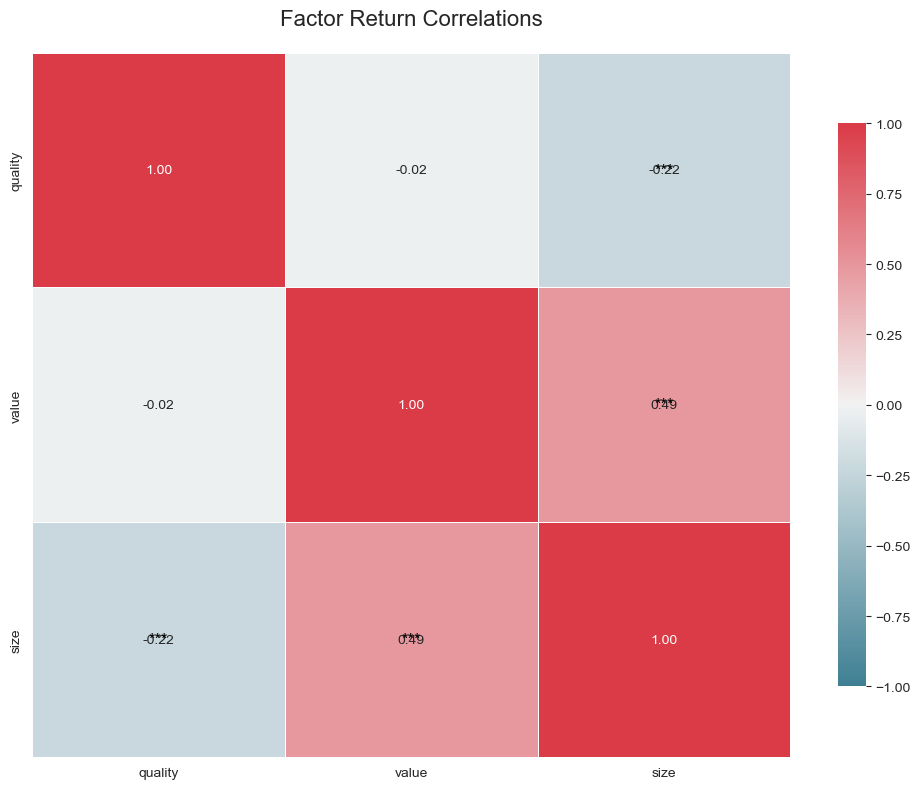

In [307]:
# Step 4B: Create improved correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_improved_correlation_heatmap(corr_matrix, p_values=None):
    """
    Plot an improved heatmap of the correlation matrix.
    
    Parameters:
    corr_matrix (DataFrame): Correlation matrix
    p_values (DataFrame): P-values for correlations
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    plt.figure(figsize=(10, 8))
    
    # Round values for display
    corr_display = corr_matrix.round(2)
    
    # Set the colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Draw the full heatmap (without mask)
    ax = sns.heatmap(
        corr_display, 
        cmap=cmap,
        vmin=-1, vmax=1, 
        center=0,
        annot=True, 
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    
    # Improve appearance
    ax.set_title('Factor Return Correlations', fontsize=16, pad=20)
    
    # Add significance indicators
    if p_values is not None:
        for i in range(len(corr_matrix)):
            for j in range(len(corr_matrix)):
                if i != j:  # Skip diagonal
                    p = p_values.iloc[i, j]
                    if not np.isnan(p):
                        if p < 0.01:
                            plt.text(j + 0.5, i + 0.5, '***', 
                                   ha='center', va='center', color='black', fontsize=12)
                        elif p < 0.05:
                            plt.text(j + 0.5, i + 0.5, '**', 
                                   ha='center', va='center', color='black', fontsize=12)
                        elif p < 0.1:
                            plt.text(j + 0.5, i + 0.5, '*', 
                                   ha='center', va='center', color='black', fontsize=12)
    
    plt.tight_layout()
    return plt.gcf()

# Create and display the correlation heatmap
# (assuming corr_matrix and p_values are already calculated)
corr_heatmap = plot_improved_correlation_heatmap(corr_matrix, p_values)

# Save plot (optional)
# corr_heatmap.savefig('factor_correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

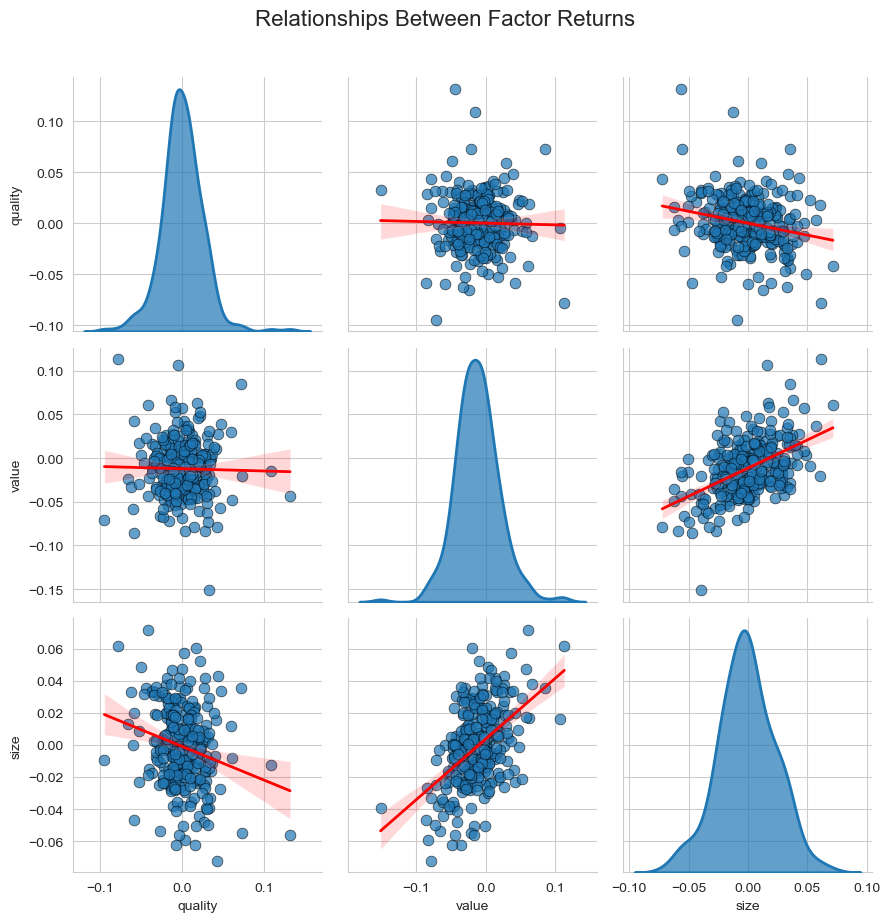

In [308]:
# Step 4C: Create improved scatter plot matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_improved_scatter_matrix(hml_returns):
    """
    Create an improved scatter plot matrix of factor returns.
    
    Parameters:
    hml_returns (DataFrame): DataFrame with factor returns
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Enhanced styling for the pairplot
    sns.set_style("whitegrid")
    
    # Create pairplot with enhanced settings
    scatter_grid = sns.pairplot(
        hml_returns, 
        kind="scatter",
        diag_kind="kde",
        plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'k', 'linewidth': 0.5},
        diag_kws={'fill': True, 'alpha': 0.7, 'linewidth': 2},
        height=3,
        aspect=1,
        corner=False  # Show full matrix, not just lower triangle
    )
    
    # Add regression lines to each scatter plot with shaded confidence interval
    for i, j in zip(*np.triu_indices_from(scatter_grid.axes, k=1)):
        ax = scatter_grid.axes[i, j]
        sns.regplot(
            x=hml_returns.iloc[:, j], 
            y=hml_returns.iloc[:, i], 
            scatter=False, 
            ax=ax, 
            line_kws={'color': 'red', 'linewidth': 2},
            ci=95  # 95% confidence interval
        )
    
    # Add regression lines to lower triangle as well
    for i, j in zip(*np.tril_indices_from(scatter_grid.axes, k=-1)):
        ax = scatter_grid.axes[i, j]
        sns.regplot(
            x=hml_returns.iloc[:, j], 
            y=hml_returns.iloc[:, i], 
            scatter=False, 
            ax=ax, 
            line_kws={'color': 'red', 'linewidth': 2},
            ci=95
        )
    
    # Improve title and layout
    plt.suptitle('Relationships Between Factor Returns', y=1.02, fontsize=16)
    plt.tight_layout()
    
    return scatter_grid.fig

# Create and display the scatter plot matrix
# (assuming hml_returns is already calculated)
scatter_matrix = plot_improved_scatter_matrix(hml_returns)

# Save plot (optional)
# scatter_matrix.savefig('factor_scatter_matrix.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

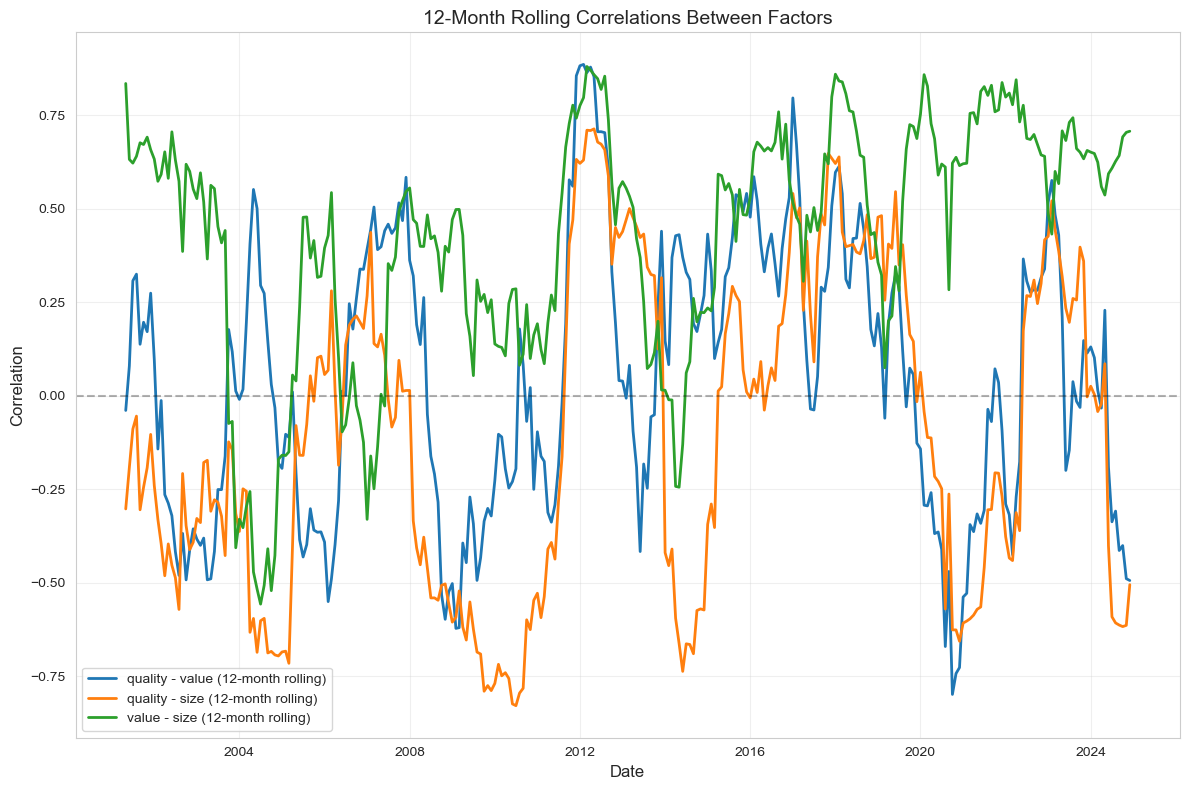

In [309]:
# Step 4D: Create rolling correlation plot

import matplotlib.pyplot as plt

def plot_rolling_correlations(hml_returns, window=12):
    """
    Plot rolling correlations between factors over time.
    
    Parameters:
    hml_returns (DataFrame): DataFrame with factor returns
    window (int): Rolling window size in months
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Calculate rolling correlations
    factors = hml_returns.columns
    pairs = [(factors[i], factors[j]) for i in range(len(factors)) for j in range(i+1, len(factors))]
    
    plt.figure(figsize=(12, 8))
    
    for f1, f2 in pairs:
        # Get the data
        data = hml_returns[[f1, f2]].dropna()
        
        # Skip if not enough data
        if len(data) < window + 1:
            continue
        
        # Calculate rolling correlation
        rolling_corr = data[f1].rolling(window=window).corr(data[f2])
        
        # Plot
        plt.plot(rolling_corr.index, rolling_corr, linewidth=2, 
                label=f'{f1} - {f2} ({window}-month rolling)')
    
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.title(f'{window}-Month Rolling Correlations Between Factors', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Correlation', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

# Create and display the rolling correlation plot
# (assuming hml_returns is already calculated)
rolling_corr_plot = plot_rolling_correlations(hml_returns, window=12)

# Save plot (optional)
# rolling_corr_plot.savefig('factor_rolling_correlations.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## B-L Model MSCI QUAL

In [394]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pypfopt import black_litterman, risk_models, expected_returns
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt
import seaborn as sns

# Let's use the data from your QUAL ETF dataset
# First, let's make sure qual_historical contains the data we need
print(f"Number of unique tickers in QUAL historical data: {qual_historical['ticker'].nunique()}")
print(f"Date range: {qual_historical['date'].min()} to {qual_historical['date'].max()}")

# Get the most recent data point for each stock to calculate market caps
latest_date = qual_historical['date'].max()
latest_data = qual_historical[qual_historical['date'] == latest_date]

print(f"Number of QUAL stocks with data on {latest_date}: {len(latest_data)}")
latest_data[['permno', 'ticker', 'mktcap', 'prc']].head()

Number of unique tickers in QUAL historical data: 135
Date range: 2000-06-30 00:00:00 to 2024-12-31 00:00:00
Number of QUAL stocks with data on 2024-12-31 00:00:00: 121


,permno,ticker,mktcap,prc
2033390,10107,MSFT,3133802341.500000,421.500000
2033392,10138,TROW,25123961.310000,113.090000
2033444,11308,KO,268203441.220000,62.260000
2033449,11403,CDNS,82405060.980000,300.460000
2033450,11404,ED,31539057.340000,89.230000


In [395]:
# Let's create a pivot table of returns to calculate covariance
# First, let's filter for the last 5 years to have recent data
from datetime import datetime, timedelta

five_years_ago = latest_date - pd.DateOffset(years=5)
print(f"Using return data from {five_years_ago} to {latest_date}")

recent_returns = qual_historical[qual_historical['date'] >= five_years_ago]

# Create a pivot table with dates as rows and tickers as columns, values are returns
returns_pivot = recent_returns.pivot_table(
    index='date', 
    columns='ticker', 
    values='ret'
)

# Fill missing values with the mean of the column (ticker)
# This is a simple approach - in practice you might want a more sophisticated method
returns_pivot = returns_pivot.fillna(returns_pivot.mean())

print(f"Shape of returns data: {returns_pivot.shape}")
returns_pivot.head()

Using return data from 2019-12-31 00:00:00 to 2024-12-31 00:00:00
Shape of returns data: (61, 125)


ticker,A,AAPL,ACGL,ACN,ADBE,ADP,AFG,AFL,AMAT,AMP,...,V,VEEV,VLTO,VRTX,WAT,WSM,WST,WTR,WTRG,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.058448,0.098784,0.021920,0.046779,0.065519,0.003795,-0.000547,-0.035376,0.054231,0.016538,...,0.018373,-0.057112,0.016151,-0.012627,0.052146,0.058213,0.022444,0.060312,-0.001515,0.098158
2020-01-31,-0.032235,0.054010,0.029611,-0.021693,0.064674,0.005220,-0.003787,-0.025142,-0.049967,-0.007024,...,0.058914,0.042301,0.016151,0.036995,-0.042200,-0.039683,0.038438,0.106519,-0.001515,0.015510
2020-02-28,-0.066497,-0.114673,-0.084466,-0.119975,-0.017144,-0.097147,-0.150473,-0.164606,0.005472,-0.141114,...,-0.085174,-0.031649,0.016151,-0.013301,-0.129139,-0.109732,-0.034562,0.083416,-0.168281,-0.007302
2020-03-31,-0.068413,-0.069762,-0.296067,-0.095963,-0.077886,-0.110542,-0.241723,-0.200933,-0.211631,-0.274735,...,-0.113556,0.101430,0.016151,0.062135,-0.065883,-0.318481,0.011225,0.083416,-0.053708,-0.116640
2020-04-30,0.070371,0.155374,-0.155657,0.139681,0.111237,0.073237,-0.049182,0.087617,0.084243,0.121585,...,0.109235,0.220183,0.016151,0.055684,0.027190,0.467102,0.244291,0.083416,0.026781,0.100458


In [396]:
# Step 3 (revised and fixed): Calculate expected returns and covariance matrix
# Let's recalculate our inputs with proper index alignment

# Calculate sample mean returns (monthly)
mean_returns = returns_pivot.mean()

# Annualize the returns (simple method)
annual_returns = mean_returns * 12

# Calculate sample covariance matrix (monthly)
monthly_cov_matrix = returns_pivot.cov()

# Annualize the covariance matrix
annual_cov_matrix = monthly_cov_matrix * 12

# Print some diagnostics
print("Sample of annualized returns:")
print(annual_returns.head())
print("\nSample of annualized covariance matrix:")
print(annual_cov_matrix.iloc[:5, :5])

# Get market caps for each ticker
mcaps = latest_data.set_index('ticker')['mktcap'].to_dict()

# Critical fix: Make sure mcaps only contains tickers that are in the covariance matrix
aligned_mcaps = {ticker: mcaps[ticker] for ticker in mcaps if ticker in annual_cov_matrix.index}

# Also ensure the covariance matrix only contains tickers that are in mcaps
common_tickers = [ticker for ticker in annual_cov_matrix.index if ticker in aligned_mcaps]
aligned_cov_matrix = annual_cov_matrix.loc[common_tickers, common_tickers]

print(f"\nAfter alignment: {len(aligned_mcaps)} tickers in mcaps")
print(f"After alignment: {aligned_cov_matrix.shape[0]} tickers in covariance matrix")

# Calculate market implied risk aversion (delta)
# Use a standard value
delta = 1.42  # Typical value for risk aversion
print(f"Using risk aversion (delta): {delta:.4f}")

# Calculate market implied prior returns with aligned inputs
prior_returns = black_litterman.market_implied_prior_returns(
    aligned_mcaps, delta, aligned_cov_matrix
)

print("\nSample of market implied prior returns:")
print(prior_returns.head())
print(f"Average market implied return: {prior_returns.mean():.4f}")

# Define risk-free rate
risk_free_rate = 0.0431  # 2% risk-free rate - adjust as needed

Sample of annualized returns:
ticker
A      0.142168
AAPL   0.309052
ACGL   0.213191
ACN    0.160314
ADBE   0.135948
dtype: Float64

Sample of annualized covariance matrix:
ticker        A     AAPL     ACGL      ACN     ADBE
ticker                                             
A      0.071708 0.036489 0.021306 0.046986 0.043296
AAPL   0.036489 0.083476 0.016088 0.052829 0.067758
ACGL   0.021306 0.016088 0.092973 0.020247 0.022284
ACN    0.046986 0.052829 0.020247 0.071519 0.062115
ADBE   0.043296 0.067758 0.022284 0.062115 0.130224

After alignment: 121 tickers in mcaps
After alignment: 121 tickers in covariance matrix
Using risk aversion (delta): 1.4200

Sample of market implied prior returns:
ticker
A      0.044979
AAPL   0.068999
ACGL   0.023607
ACN    0.061847
ADBE   0.078773
dtype: float64
Average market implied return: 0.0453


In [397]:

# Let's create our views based on size and value factors
# First, get the latest data for P/B ratio (value factor) and size
latest_data['bm_ratio'] = latest_data['ceq'] / latest_data['mktcap']  # Book-to-Market ratio
latest_data['size'] = latest_data['mktcap']  # Size (market cap)

# 2) Create quintiles for size only once, across the entire dataset
size_labels = [4, 3, 2, 1, 0]
latest_data['size_quintile'] = pd.qcut(latest_data['size'], 5, labels=size_labels, duplicates='drop')

# 3) Within each size quintile, create quintiles for value (bm_ratio).
#    This ensures each of the 25 subgroups is of roughly equal size.
def assign_value_quintile(sub_df):
    sub_df['value_quintile'] = pd.qcut(
        sub_df['bm_ratio'], 
        5, 
        labels=False, 
        duplicates='drop'
    )
    return sub_df

latest_data = latest_data.groupby('size_quintile', group_keys=False).apply(assign_value_quintile)

# Higher quintile (4) = smaller size, more value
# Lower quintile (0) = larger size, less value (growth)

# Display the distribution
print("Size-Value distribution:")
print(pd.crosstab(latest_data['size_quintile'], latest_data['value_quintile']))

# Identify the stocks in the extreme corners of our 5x5 grid
small_value = latest_data[(latest_data['size_quintile'] == 4) & (latest_data['value_quintile'] == 4)]
large_growth = latest_data[(latest_data['size_quintile'] == 0) & (latest_data['value_quintile'] == 0)]

print(f"\nSmall-Value stocks (expecting outperformance):")
print(small_value[['ticker', 'size', 'bm_ratio']].head())

print(f"\nLarge-Growth stocks (expecting underperformance):")
print(large_growth[['ticker', 'size', 'bm_ratio']].head())


Size-Value distribution:
value_quintile  0  1  2  3  4
size_quintile                
4               5  5  5  5  5
3               5  5  4  5  5
2               5  5  4  5  5
1               5  5  4  5  5
0               5  5  4  5  5

Small-Value stocks (expecting outperformance):
        ticker            size  bm_ratio
2039425   WTRG  9973871.520000  0.000622
2039428    IPG 10437870.300000  0.000364
2039510    AFG 11492671.830000  0.000389
2040096     RS 14572351.200000  0.000495
2040540   UTHR 15752541.800000  0.000409

Large-Growth stocks (expecting underperformance):
        ticker              size  bm_ratio
2034172   AAPL 3785304395.660000  0.000015
2039403    LLY  732871952.000000  0.000019
2040506   NVDA 3288762100.000000  0.000013
2040546   COST  406770736.340000  0.000058
2041295     MA  479583105.760000  0.000014


In [398]:
# Step 5 (revised): Define more explicit factor views
# First, let's create the factor scores directly from qual_historical data

# Calculate factor scores for QUAL ETF stocks
def calculate_qual_factor_scores(df):
    """Calculate factor scores for QUAL ETF stocks"""
    result = df.copy()
    
    # Create factors from most recent data
    latest_date = result['date'].max()
    latest_data = result[result['date'] == latest_date]
    
    # --- Quality Factor ---
    # Return on Equity (ROE) = Net Income / Book Equity
    latest_data['roe'] = latest_data['ni'] / latest_data['ceq']
    
    # Return on Assets (ROA) = Net Income / Total Assets
    latest_data['roa'] = latest_data['ni'] / latest_data['at']
    
    # --- Value Factor ---
    # Book-to-Market Ratio (B/M) = Book Equity / Market Cap
    latest_data['bm_ratio'] = latest_data['ceq'] / latest_data['mktcap']
    
    # --- Size Factor ---
    # Just use market cap directly
    latest_data['size'] = latest_data['mktcap']
    
    # Calculate z-scores for normalization
    latest_data['roe_z'] = (latest_data['roe'] - latest_data['roe'].mean()) / latest_data['roe'].std()
    latest_data['roa_z'] = (latest_data['roa'] - latest_data['roa'].mean()) / latest_data['roa'].std()
    latest_data['bm_z'] = (latest_data['bm_ratio'] - latest_data['bm_ratio'].mean()) / latest_data['bm_ratio'].std()
    latest_data['size_z'] = -(latest_data['size'] - latest_data['size'].mean()) / latest_data['size'].std()
    
    # Create composite scores
    latest_data['quality_score'] = (latest_data['roe_z'] + latest_data['roa_z']) / 2
    latest_data['value_score'] = latest_data['bm_z']
    latest_data['size_score'] = latest_data['size_z']  # negative so higher = smaller
    
    # Set ticker as the index
    factor_scores = latest_data.set_index('ticker')[['quality_score', 'value_score', 'size_score', 'mktcap']]
    
    return factor_scores

# Calculate factor scores
factor_scores = calculate_qual_factor_scores(qual_historical)

# Check the factor scores
print("Factor score statistics:")
print(factor_scores.describe())

# Calculate a combined size+value score
factor_scores['combined_score'] = factor_scores['size_score'] + factor_scores['value_score']

# Sort stocks by this combined score (higher is better - more small and value)
sorted_stocks = factor_scores.sort_values('combined_score', ascending=False)

# Top quintile (most small + value)
top_quintile = sorted_stocks.head(len(sorted_stocks) // 5)
# Bottom quintile (most large + growth)
bottom_quintile = sorted_stocks.tail(len(sorted_stocks) // 5)

print(f"\nTop quintile (small + value) average scores:")
print(f"Size: {top_quintile['size_score'].mean():.4f}")
print(f"Value: {top_quintile['value_score'].mean():.4f}")

print(f"\nBottom quintile (large + growth) average scores:")
print(f"Size: {bottom_quintile['size_score'].mean():.4f}")
print(f"Value: {bottom_quintile['value_score'].mean():.4f}")

# Create our view dictionary
view_dict = {}

# Now define our views based on quintiles
for ticker in top_quintile.index:
    view_dict[ticker] = 0.0408  # 10% expected outperformance

for ticker in bottom_quintile.index:
    view_dict[ticker] = -0.0408  # 10% expected underperformance

print(f"\nNumber of stocks with positive views: {sum(1 for v in view_dict.values() if v > 0)}")
print(f"Number of stocks with negative views: {sum(1 for v in view_dict.values() if v < 0)}")

# See a sample of our views
print("\nSample views:")
sample_views = list(view_dict.items())[:5]
for ticker, view in sample_views:
    print(f"{ticker}: {view:.2f}")

Factor score statistics:
       quality_score  value_score  size_score            mktcap
count     121.000000   121.000000  121.000000        121.000000
mean        0.000000    -0.000000    0.000000  188548100.661653
std         0.855633     1.000000    1.000000  548593605.289148
min        -1.623048    -1.078315   -6.556322    8182403.390000
25%        -0.533601    -0.700192    0.154652   22795658.000000
50%        -0.091972    -0.345379    0.264103   43662894.000000
75%         0.371426     0.282166    0.302141  103706928.300000
max         3.443164     3.623465    0.328778 3785304395.660000

Top quintile (small + value) average scores:
Size: 0.2711
Value: 1.7231

Bottom quintile (large + growth) average scores:
Size: -0.9551
Value: -0.7462

Number of stocks with positive views: 24
Number of stocks with negative views: 24

Sample views:
EXE: 0.04
ED: 0.04
WTRG: 0.04
ACGL: 0.04
ATO: 0.04


In [423]:
# Step 6 and 7 combined: Create and optimize the Black-Litterman portfolio
from pypfopt import objective_functions

# First, check which tickers are in our returns pivot and covariance matrix
cov_tickers = set(annual_cov_matrix.index)
returns_tickers = set(returns_pivot.columns)

# Get the intersection of both - these are the tickers we can actually use
valid_tickers = list(cov_tickers.intersection(returns_tickers))
print(f"Number of valid tickers after intersection: {len(valid_tickers)}")

# Now filter the covariance matrix
filtered_cov = annual_cov_matrix.loc[valid_tickers, valid_tickers]

# Check if prior_returns contains all valid tickers
prior_tickers = set(prior_returns.index)
final_valid_tickers = list(set(valid_tickers).intersection(prior_tickers))
print(f"Final number of valid tickers: {len(final_valid_tickers)}")

# Now filter views to include only tickers that exist in all datasets
filtered_views = {}
for ticker, view in view_dict.items():
    if ticker in final_valid_tickers:
        filtered_views[ticker] = view

print(f"Number of views after filtering: {len(filtered_views)}")

# Handle empty views case
if not filtered_views:
    print("No valid views after filtering. Creating a default view.")
    if final_valid_tickers:  # Make sure we have at least one valid ticker
        sample_ticker = final_valid_tickers[0]
        filtered_views[sample_ticker] = 0.0408  # 5% outperformance view
        print(f"Created default view for {sample_ticker}")

# Initialize the Black-Litterman model with properly filtered data
bl = BlackLittermanModel(
    filtered_cov.loc[final_valid_tickers, final_valid_tickers],
    pi=prior_returns.loc[final_valid_tickers],
    absolute_views=filtered_views,
    omega='idzorek',
    view_confidences=[1] * len(filtered_views)
)

# Calculate posterior returns
bl_returns = bl.bl_returns()
print("\nBlack-Litterman posterior returns (first 5):")
print(bl_returns.head())

# Make sure bl_returns and filtered_cov have exactly the same tickers in the same order
common_tickers = list(set(bl_returns.index).intersection(set(filtered_cov.index)))
print(f"Number of common tickers between returns and covariance: {len(common_tickers)}")

# Re-align both datasets to use the same tickers in the same order
aligned_returns = bl_returns.loc[common_tickers]
aligned_cov = filtered_cov.loc[common_tickers, common_tickers]

# Now let's optimize the portfolio using the properly aligned data
ef = EfficientFrontier(aligned_returns, aligned_cov)

# # Add constraints:
# ef.add_constraint(lambda w: w <= 0.10)  # Max 10% in any single stock
# ef.add_constraint(lambda w: w >= 0.005)  # Min 0.5% in any stock

# Use L2 regularization for more stable weights
gamma = 0.1
ef.add_objective(objective_functions.L2_reg, gamma=gamma)

# Find the max Sharpe ratio portfolio
ef.max_sharpe()

# Get the weights
weights = ef.clean_weights()

# Print the weights
print("\nPortfolio weights with diversification constraints:")
sorted_weights = sorted(weights.items(), key=lambda x: x[1], reverse=True)
for ticker, weight in sorted_weights:
    if weight > 0.01:  # Only show positions with >1% allocation
        print(f"{ticker}: {weight:.4f}")

# Calculate portfolio performance
expected_return, annual_volatility, sharpe = ef.portfolio_performance()
print(f"\nExpected annual return: {expected_return:.4f}")
print(f"Annual volatility: {annual_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")

Number of valid tickers after intersection: 125
Final number of valid tickers: 121
Number of views after filtering: 48

Black-Litterman posterior returns (first 5):
ticker
COST   -0.040800
CAT     0.006677
PAYX   -0.070456
HSY     0.006081
CSGP   -0.011671
dtype: float64
Number of common tickers between returns and covariance: 121

Portfolio weights with diversification constraints:
VLTO: 0.2218
TPL: 0.1790
LPLA: 0.1042
POOL: 0.0701
TSCO: 0.0676
ODFL: 0.0588
ZTS: 0.0580
AVY: 0.0548
EXE: 0.0511
SOLV: 0.0487
DOCU: 0.0429
WST: 0.0236
CBRE: 0.0195

Expected annual return: 0.1837
Annual volatility: 0.1637
Sharpe Ratio: 1.1220


In [425]:
# Step 9 (fixed): Compare Black-Litterman portfolio with equal-weight portfolio
# Make sure we use only tickers that are in both valid_tickers and prior_returns

# Find tickers that are in both valid_tickers and prior_returns
common_tickers = [ticker for ticker in valid_tickers if ticker in prior_returns.index]
print(f"Number of tickers for equal-weight portfolio: {len(common_tickers)}")

# Calculate equal-weight portfolio
n_assets = len(common_tickers)
equal_weights = {ticker: 1.0/n_assets for ticker in common_tickers}

# Calculate equal-weight portfolio performance
equal_ret = 0
for ticker in common_tickers:
    if ticker in prior_returns.index:  # Extra safety check
        equal_ret += prior_returns.loc[ticker] * equal_weights[ticker]

# Calculate equal-weight portfolio variance/volatility
equal_var = 0
for i, ticker_i in enumerate(common_tickers):
    for j, ticker_j in enumerate(common_tickers):
        if ticker_i in filtered_cov.index and ticker_j in filtered_cov.columns:  # Safety check
            equal_var += equal_weights[ticker_i] * equal_weights[ticker_j] * filtered_cov.loc[ticker_i, ticker_j]

equal_vol = np.sqrt(equal_var)
equal_sharpe = equal_ret / equal_vol if equal_vol > 0 else 0

# Print portfolio comparison
print("\nComparison of Portfolio Performance:")
print(f"{'Metric':<20} {'Black-Litterman':<20} {'Equal Weight':<20}")
print(f"{'-'*60}")
print(f"{'Expected Return':<20} {expected_return:.4f}{' '*16} {equal_ret:.4f}")
print(f"{'Volatility':<20} {annual_volatility:.4f}{' '*16} {equal_vol:.4f}")
print(f"{'Sharpe Ratio':<20} {sharpe:.4f}{' '*16} {equal_sharpe:.4f}")

Number of tickers for equal-weight portfolio: 121

Comparison of Portfolio Performance:
Metric               Black-Litterman      Equal Weight        
------------------------------------------------------------
Expected Return      0.1837                 0.0453
Volatility           0.1637                 0.1809
Sharpe Ratio         1.1220                 0.2504


In [421]:
# First, let's check what columns are available in latest_data
print("Columns available in latest_data:")
print(latest_data.columns.tolist())

# Try a different approach to calculate factor exposures
# We'll create a new DataFrame with the factor scores for stocks in both portfolios

# Combine all tickers from both portfolios
all_portfolio_tickers = set(weights.keys()).union(set(equal_weights.keys()))
print(f"Total unique tickers across both portfolios: {len(all_portfolio_tickers)}")

# Create a DataFrame to store factor scores
# We'll use the previously calculated factor scores from data_with_scores
factor_scores = pd.DataFrame(index=list(all_portfolio_tickers))

# Find the latest factor scores for each ticker in our portfolios
for ticker in all_portfolio_tickers:
    # Get the latest data for this ticker
    ticker_data = data_with_scores[data_with_scores['ticker'] == ticker]
    if not ticker_data.empty:
        # Get the most recent data point
        latest_ticker_data = ticker_data.sort_values('date').iloc[-1]
        
        # Add factor scores to our DataFrame
        factor_scores.loc[ticker, 'quality_score'] = latest_ticker_data['quality_score']
        factor_scores.loc[ticker, 'value_score'] = latest_ticker_data['value_score']
        factor_scores.loc[ticker, 'size_score'] = latest_ticker_data['size_score']
        factor_scores.loc[ticker, 'mktcap'] = latest_ticker_data['mktcap']

# Check if we have factor data
print(f"Number of stocks with factor data: {factor_scores.dropna().shape[0]}")
print(factor_scores.head())

# Now calculate factor exposures with our properly constructed factor data
def calculate_factor_exposure(weights, factor_data):
    """
    Calculate the weighted factor exposure of a portfolio
    
    Parameters:
    weights (dict): Dictionary of portfolio weights by ticker
    factor_data (DataFrame): DataFrame with factor scores indexed by ticker
    
    Returns:
    dict: Dictionary of factor exposures
    """
    exposures = {}
    
    # Only use these factor columns
    factor_columns = ['quality_score', 'value_score', 'size_score']
    
    for factor in factor_columns:
        exposure = 0
        total_weight = 0
        
        for ticker, weight in weights.items():
            if ticker in factor_data.index and not pd.isna(factor_data.loc[ticker, factor]):
                exposure += weight * factor_data.loc[ticker, factor]
                total_weight += weight
        
        # Normalize by total weight accounted for
        if total_weight > 0:
            exposures[factor] = exposure / total_weight
        else:
            exposures[factor] = np.nan
            
    return exposures

# Calculate factor exposures for Black-Litterman portfolio
bl_exposures = calculate_factor_exposure(weights, factor_scores)

# Calculate factor exposures for equal-weight portfolio
equal_exposures = calculate_factor_exposure(equal_weights, factor_scores)

# Display the factor exposures side by side
print("\nFactor Exposures Comparison:")
print(f"{'Factor':<15} {'Black-Litterman':<20} {'Equal Weight':<20} {'Difference':<15}")
print(f"{'-'*70}")

for factor in bl_exposures.keys():
    bl_exp = bl_exposures[factor]
    eq_exp = equal_exposures[factor]
    diff = bl_exp - eq_exp
    print(f"{factor:<15} {bl_exp:>18.4f} {eq_exp:>18.4f} {diff:>+14.4f}")

# Calculate weighted average market cap for both portfolios
def calculate_weighted_mktcap(weights, factor_data):
    """Calculate weighted average market cap of a portfolio"""
    weighted_mktcap = 0
    total_weight = 0
    
    for ticker, weight in weights.items():
        if ticker in factor_data.index and not pd.isna(factor_data.loc[ticker, 'mktcap']):
            weighted_mktcap += weight * factor_data.loc[ticker, 'mktcap']
            total_weight += weight
    
    if total_weight > 0:
        return weighted_mktcap / total_weight
    else:
        return np.nan

# Calculate weighted market caps
bl_weighted_mktcap = calculate_weighted_mktcap(weights, factor_scores)
equal_weighted_mktcap = calculate_weighted_mktcap(equal_weights, factor_scores)

print("\nMarket Cap Concentration:")
print(f"Black-Litterman weighted avg market cap: ${bl_weighted_mktcap/1e6:.2f} million")
print(f"Equal-Weight weighted avg market cap: ${equal_weighted_mktcap/1e6:.2f} million")
if equal_weighted_mktcap > 0:
    print(f"Relative size (BL/Equal): {bl_weighted_mktcap/equal_weighted_mktcap:.2f}x")

Columns available in latest_data:
['permno', 'permco', 'ticker', 'date', 'prc', 'ret', 'retx', 'shrout', 'mktcap', 'siccd', 'year', 'gvkey', 'datadate', 'fyear', 'ceq', 'ni', 'at', 'linktype', 'linkprim', 'linkdt', 'linkenddt', 'bm_ratio', 'size', 'size_quintile', 'value_quintile']
Total unique tickers across both portfolios: 121
Number of stocks with factor data: 104
      quality_score  value_score  size_score           mktcap
COST       0.021694    -0.629010   -6.280826 364421370.000000
CAT        0.071897    -0.285062   -1.753198 124669180.040000
PAYX       0.398283    -0.486293   -0.053664  50464897.560000
HSY        0.747360     0.157830    0.490581  25019938.350000
CSGP      -0.512696    -0.421642    0.397985  29349036.400000

Factor Exposures Comparison:
Factor          Black-Litterman      Equal Weight         Difference     
----------------------------------------------------------------------
quality_score               0.1832             0.2609        -0.0777
value_score  